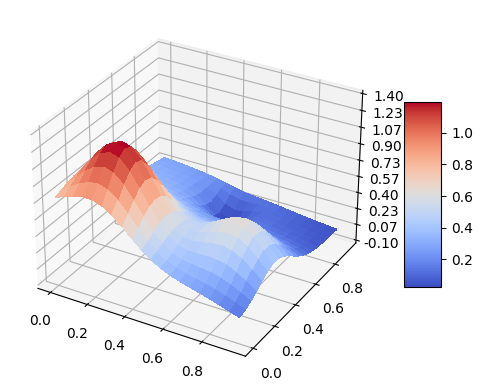

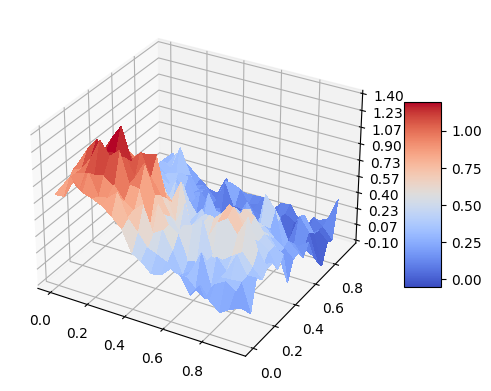

In [ ]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import random
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.utils import resample
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import pandas as pd


import seaborn as sns # import the seaborn library
from matplotlib.colors import LogNorm

np.random.seed(7935)

fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')
# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

#add the noise to the franke function
f = FrankeFunction(x,y) + np.random.normal(0, 0.1, z.shape)

fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')

# Plot the surface.
surf = ax.plot_surface(x, y, f, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

f = f.ravel()




# OLS

Degree: 0
MSE Train Data: 0.0879596751663517
MSE Test Data: 0.11617419305776962
R2 Train Data: 0.0
R2 Test Data: -0.09134393182841305
------------------------------
Degree: 1
MSE Train Data: 0.03803631666981749
MSE Test Data: 0.027013967345325483
R2 Train Data: 0.6050174399779104
R2 Test Data: 0.6522283156509949
------------------------------
Degree: 2
MSE Train Data: 0.028289490630570357
MSE Test Data: 0.027924086217488653
R2 Train Data: 0.6765196885666074
R2 Test Data: 0.7585607607006769
------------------------------
Degree: 3
MSE Train Data: 0.019444689467862635
MSE Test Data: 0.015313893504484477
R2 Train Data: 0.7883551485910489
R2 Test Data: 0.8424385389482747
------------------------------
Degree: 4
MSE Train Data: 0.013696905487272214
MSE Test Data: 0.016050714169308138
R2 Train Data: 0.8517204727686902
R2 Test Data: 0.8294897206031399
------------------------------
Degree: 5
MSE Train Data: 0.012394915570388208
MSE Test Data: 0.011822931947529801
R2 Train Data: 0.865391051209

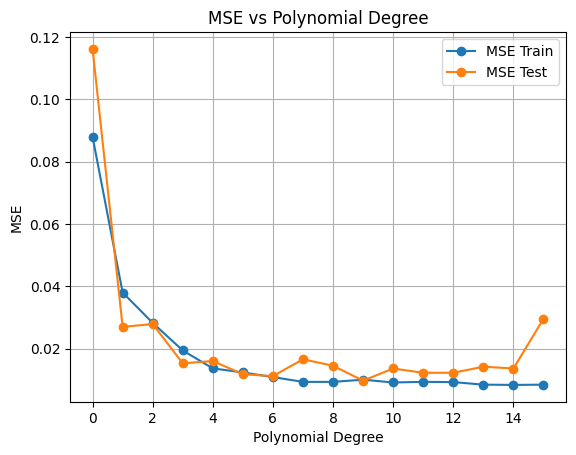

In [ ]:
# calcolo MSE
def calculateMSE(f, fpred):
  mse=np.mean((f-fpred)**2)
  return mse

#calculate R2
def R2(f_data, f_model): #calculate R
    return 1 - np.sum((f_data - f_model) ** 2) / np.sum((f_data - np.mean(f_data)) ** 2)

#def function to calculate the design matrix
def design_matrix(x, y, degree):
    # x and y are expected to be 1-dimensional arrays
    x = x.ravel()  # Flatten x
    y = y.ravel()  # Flatten y
    N = len(x)
    l = int((degree + 1) * (degree + 2) / 2)  # Number of polynomial terms
    X = np.ones((N, l))

    idx = 0
    for i in range(degree + 1):
        for j in range(i + 1):
            X[:, idx] = (x ** (i - j)) * (y ** j)
            idx += 1
    return X


# OLS
def calcuateB(X, f):
  beta = np.linalg.pinv(X.T @ X) @ X.T @ f
  return beta

#create vectors to store data
maxdegree = 16
polydegree = np.zeros(maxdegree)
MSE_train = np.zeros(maxdegree)
MSE_test = np.zeros(maxdegree)
R2_train = np.zeros(maxdegree)
R2_test = np.zeros(maxdegree)

# for loop for every polynomial degree
for degree in range (maxdegree):

    # create design matrix
    X = design_matrix(x, y, degree)
    #beta = calcuateB(X, f)


    #divide into train and test data
    X_train, X_test, f_train, f_test = train_test_split(X, f, test_size=0.2)

    #explain why we dont scale the data
    #ask about the intercept
    #maybe create a validation set

    #OLS
    # calculate beta
    beta = calcuateB(X_train, f_train)

    ftilde = X_train @ beta
    fpred = X_test @ beta
    polydegree[degree] = degree
    MSE_train[degree] = calculateMSE(f_train, ftilde)
    MSE_test[degree] = calculateMSE(f_test, fpred)
    R2_train[degree] = R2(f_train, ftilde)
    R2_test[degree] = R2(f_test, fpred)

    print(f"Degree: {degree}")
    #print(f"Beta: {beta}")
    print(f"MSE Train Data: {MSE_train[degree]}")
    print(f"MSE Test Data: {MSE_test[degree]}")
    print(f"R2 Train Data: {R2_train[degree]}")
    print(f"R2 Test Data: {R2_test[degree]}")
    print("-" * 30)


# Plotting MSE values
plt.plot(polydegree, MSE_train, label='MSE Train', marker='o')
plt.plot(polydegree, MSE_test, label='MSE Test', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('MSE vs Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()

# Ridge


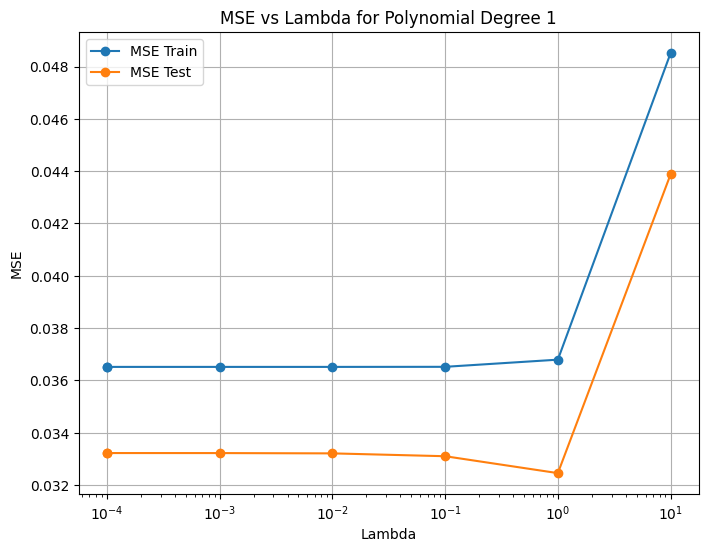

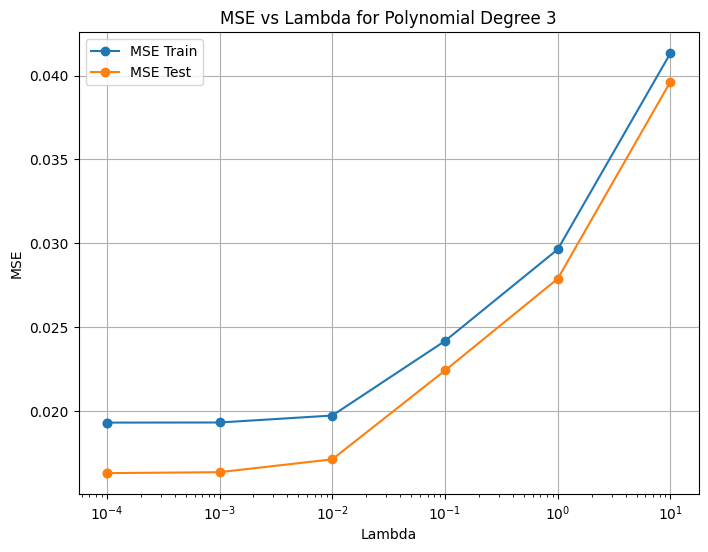

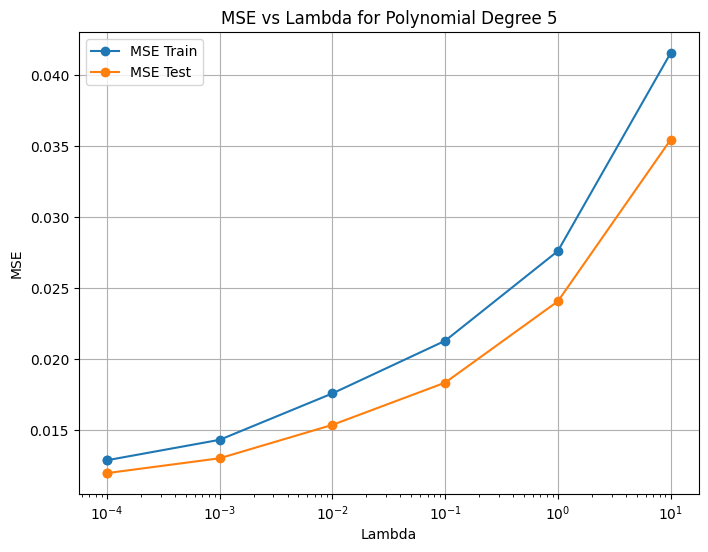

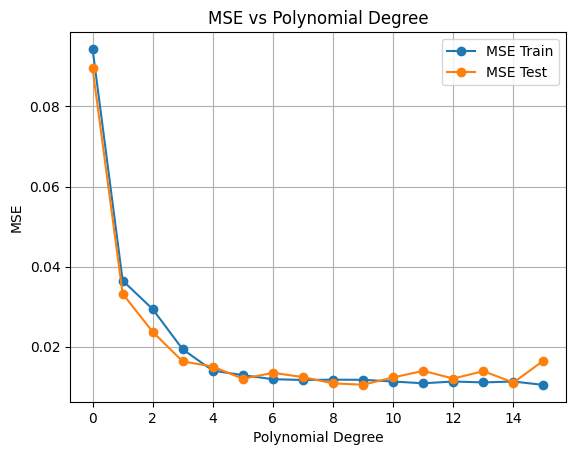

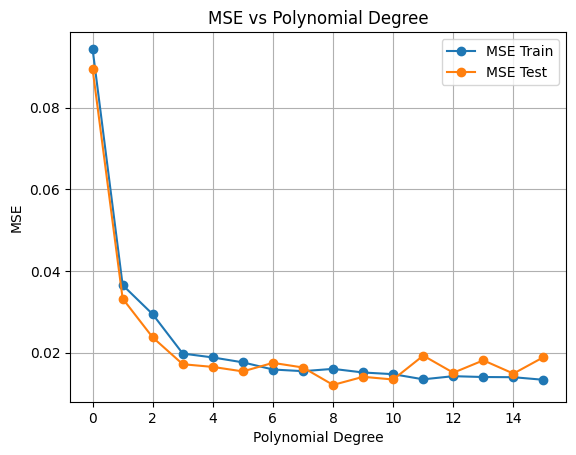

In [ ]:
#RIDGE

# Ridge
def betaRIDGE(X, f, lm):
  I = np.identity(X.shape[1])  # Identity matrix
  beta_RIDGE = np.linalg.inv(X.T @ X + lm * I) @ X.T @ f
  return beta_RIDGE

lm_val = [10e-5, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]

MSEridge_train = np.zeros((maxdegree,len(lm_val)))
MSEridge_test = np.zeros((maxdegree,len(lm_val)))
R2ridge_train = np.zeros((maxdegree,len(lm_val)))
R2ridge_test = np.zeros((maxdegree,len(lm_val)))

#start of the big loop
for i in range (maxdegree):
  X = design_matrix(x, y, i)
  X_train, X_test, f_train, f_test = train_test_split(X, f, test_size=0.2)
  #polynomial ridge regression (both with my model and scikt)
  for j, lmd in enumerate(lm_val):
      betaridge = betaRIDGE(X_train, f_train, lmd)
      ftildeRidge = X_train @ betaridge
      fpredictRidge = X_test @ betaridge
      #fill the matrices
      MSEridge_train[i, j] = calculateMSE(f_train, ftildeRidge)
      MSEridge_test[i, j] = calculateMSE(f_test, fpredictRidge)
      R2ridge_train[i, j] = R2(f_train, ftildeRidge)
      R2ridge_test[i, j] = R2(f_test, fpredictRidge)

  if i in [1, 3, 5]:
      plt.figure(figsize=(8, 6))
      plt.plot(lm_val, MSEridge_train[i], label='MSE Train', marker='o')
      plt.plot(lm_val, MSEridge_test[i], label='MSE Test', marker='o')
      plt.xscale('log')  # Scala logaritmica per lambda
      plt.xlabel('Lambda')
      plt.ylabel('MSE')
      plt.title(f'MSE vs Lambda for Polynomial Degree {i}')
      plt.legend()
      plt.grid(True)
      plt.show()

for k, lmd in enumerate(lm_val):
    if k in [1, 3]:
        plt.plot(polydegree, MSEridge_train[:,k], label='MSE Train', marker='o')
        plt.plot(polydegree, MSEridge_test[:,k], label='MSE Test', marker='o')
        plt.xlabel('Polynomial Degree')
        plt.ylabel('MSE')
        plt.title('MSE vs Polynomial Degree')
        plt.legend()
        plt.grid(True)
        plt.show()



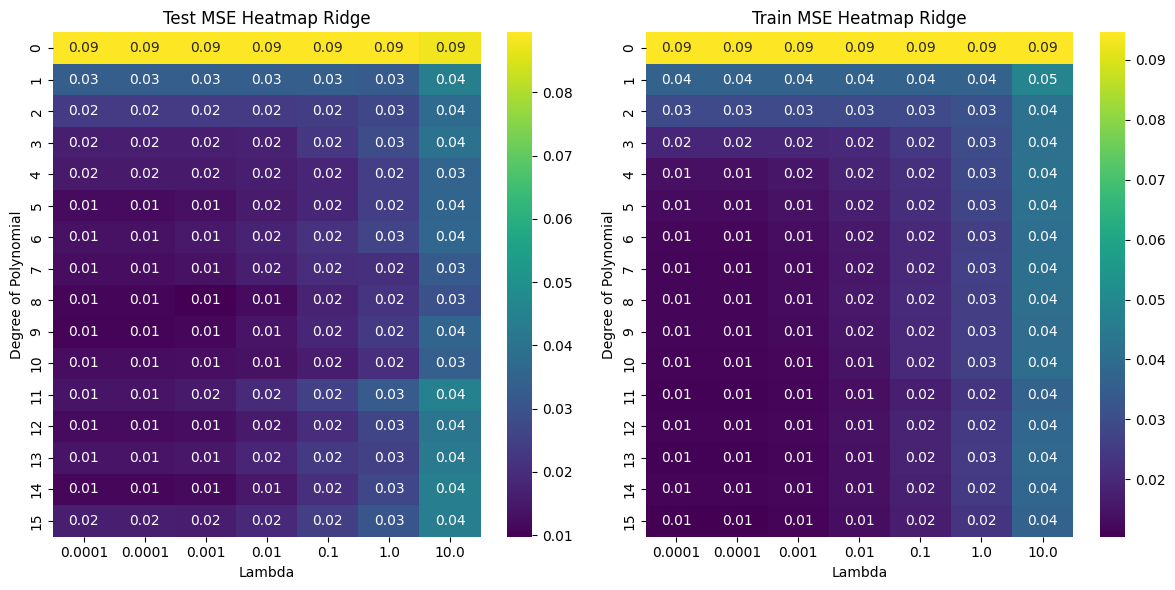

In [ ]:
# Creazione delle heatmap per i risultati
plt.figure(figsize=(12, 6))

# Heatmap per l'errore di test MSE Ridge
plt.subplot(1, 2, 1)
sns.heatmap(MSEridge_test, annot=True, fmt=".2f", cmap='viridis', xticklabels=lm_val, yticklabels=range(maxdegree) )
ax.set_aspect('equal', adjustable='box')
plt.title('Test MSE Heatmap Ridge')
plt.xlabel('Lambda')
plt.ylabel('Degree of Polynomial')

# Heatmap per l'errore di addestramento MSE Ridge
plt.subplot(1, 2, 2)
sns.heatmap(MSEridge_train, annot=True, fmt=".2f", cmap='viridis', xticklabels=lm_val, yticklabels=range(maxdegree))
plt.title('Train MSE Heatmap Ridge')
plt.xlabel('Lambda')
plt.ylabel('Degree of Polynomial')

# Imposta il layout per evitare sovrapposizioni
plt.tight_layout()
plt.show()

# Lasso


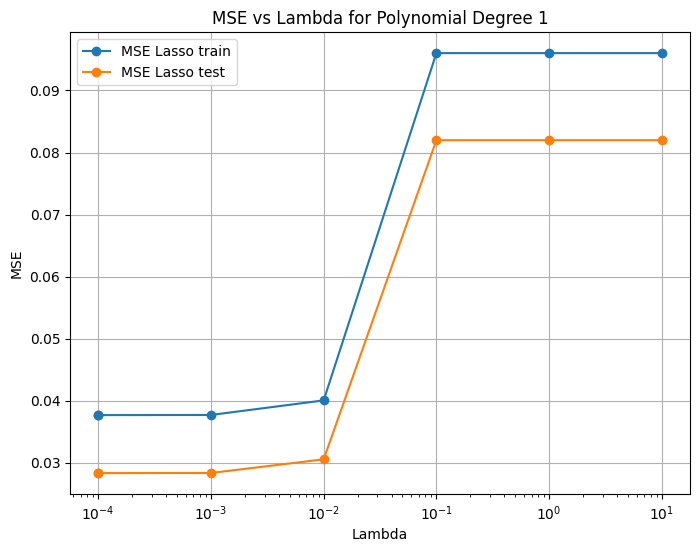

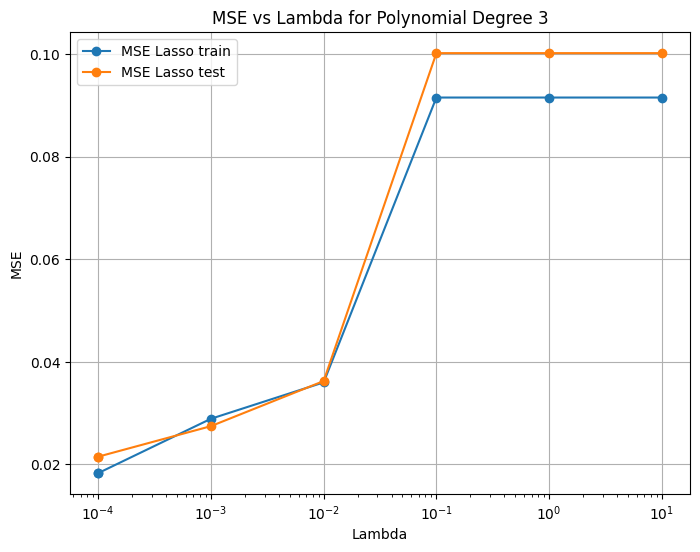

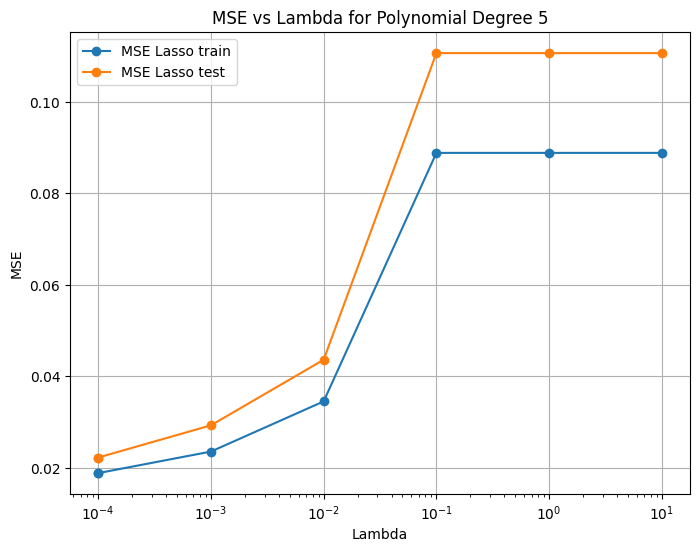

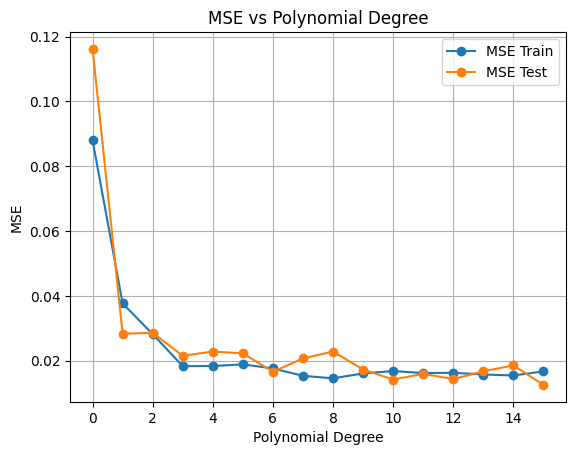

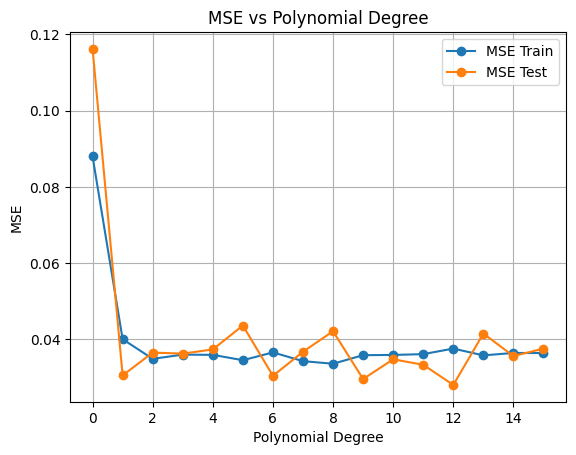

In [ ]:
#LASSO

MSElasso_train = np.zeros((maxdegree,len(lm_val)))
MSElasso_test = np.zeros((maxdegree,len(lm_val)))
R2lasso_train = np.zeros((maxdegree,len(lm_val)))
R2lasso_test = np.zeros((maxdegree,len(lm_val)))


#start of the big loop
for i in range (maxdegree):
  X = design_matrix(x, y, i)
  X_train, X_test, f_train, f_test = train_test_split(X, f, test_size=0.2)

  #polynomial ridge regression (both with my model and scikt)
  for j, lmd in enumerate(lm_val):
      RegLasso = linear_model.Lasso(lmd,fit_intercept=True, max_iter=100000)
      RegLasso.fit(X_train,f_train)
      fpredictLasso = RegLasso.predict(X_test)
      ftildeLasso = RegLasso.predict(X_train)
      #fill the matrices
      MSElasso_train[i,j] = calculateMSE(f_train, ftildeLasso)
      MSElasso_test[i,j] = calculateMSE(f_test, fpredictLasso)
      R2lasso_train[i,j] = R2(f_train, ftildeLasso)
      R2lasso_test[i,j] = R2(f_test, fpredictLasso)

  if i in [1, 3, 5]:
      plt.figure(figsize=(8, 6))
      plt.plot(lm_val, MSElasso_train[i], label='MSE Lasso train', marker='o')
      plt.plot(lm_val, MSElasso_test[i], label='MSE Lasso test', marker='o')
      plt.xscale('log')  # Scala logaritmica per lambda
      plt.xlabel('Lambda')
      plt.ylabel('MSE')
      plt.title(f'MSE vs Lambda for Polynomial Degree {i}')
      plt.legend()
      plt.grid(True)
      plt.show()

for k, lmd in enumerate(lm_val):
    if k in [1, 3]:
        plt.plot(polydegree, MSElasso_train[:,k], label='MSE Train', marker='o')
        plt.plot(polydegree, MSElasso_test[:,k], label='MSE Test', marker='o')
        plt.xlabel('Polynomial Degree')
        plt.ylabel('MSE')
        plt.title('MSE vs Polynomial Degree')
        plt.legend()
        plt.grid(True)
        plt.show()




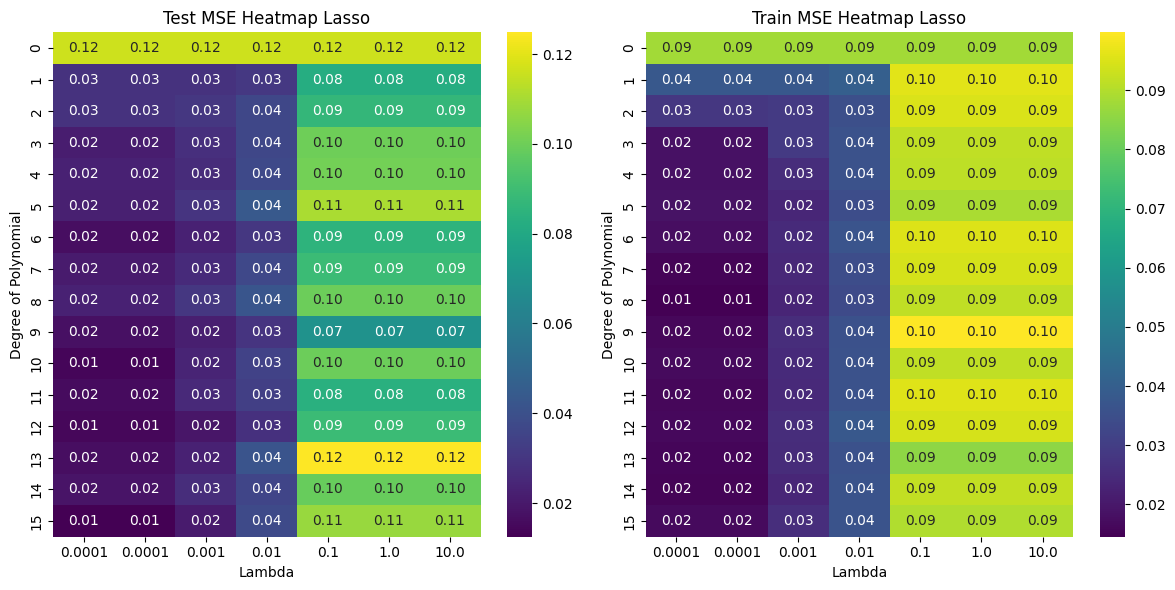

In [ ]:
# Creazione delle heatmap per i risultati
plt.figure(figsize=(12, 6))

# Heatmap per l'errore di test MSE Ridge
plt.subplot(1, 2, 1)
sns.heatmap(MSElasso_test, annot=True, fmt=".2f", cmap='viridis', xticklabels=lm_val, yticklabels=range(maxdegree) )
ax.set_aspect('equal', adjustable='box')
plt.title('Test MSE Heatmap Lasso')
plt.xlabel('Lambda')
plt.ylabel('Degree of Polynomial')

# Heatmap per l'errore di addestramento MSE Ridge
plt.subplot(1, 2, 2)
sns.heatmap(MSElasso_train, annot=True, fmt=".2f", cmap='viridis', xticklabels=lm_val, yticklabels=range(maxdegree))
plt.title('Train MSE Heatmap Lasso')
plt.xlabel('Lambda')
plt.ylabel('Degree of Polynomial')

# Imposta il layout per evitare sovrapposizioni
plt.tight_layout()
plt.show()

# Bias-variance trade-off (OLS)


Degree: 0
MSE: 0.11405501873434916
Bias: 0.11378890678723134
Variance: 0.0002661119471177776
0.11405501873434916 >= 0.11378890678723134 + 0.0002661119471177776 = 0.11405501873434912
------------------------------
Degree: 1
MSE: 0.035033954661981746
Bias: 0.03466005891685603
Variance: 0.0003738957451257186
0.035033954661981746 >= 0.03466005891685603 + 0.0003738957451257186 = 0.035033954661981746
------------------------------
Degree: 2
MSE: 0.03145359165322501
Bias: 0.030984983114612875
Variance: 0.0004686085386121381
0.03145359165322501 >= 0.030984983114612875 + 0.0004686085386121381 = 0.03145359165322501
------------------------------
Degree: 3
MSE: 0.022020573783304083
Bias: 0.021449580211867034
Variance: 0.0005709935714370433
0.022020573783304083 >= 0.021449580211867034 + 0.0005709935714370433 = 0.022020573783304076
------------------------------
Degree: 4
MSE: 0.018021938157153892
Bias: 0.017370998183653213
Variance: 0.0006509399735006798
0.018021938157153892 >= 0.01737099818365321

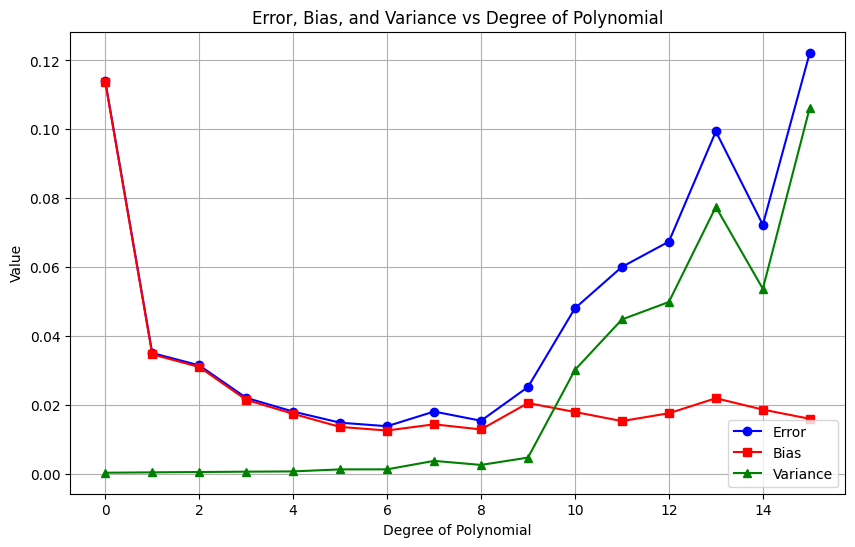

In [ ]:

maxdegree= 16
polydegree = np.zeros(maxdegree)
error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)

n_boostraps = 200

for i in range(maxdegree):
    X = design_matrix(x, y, i)
    X_train, X_test, f_train, f_test = train_test_split(X, f, test_size=0.2)
    f_pred = np.empty((f_test.shape[0], n_boostraps))
    for j in range(n_boostraps):
        X_, f_ = resample(X_train, f_train)
        beta_resampled = calcuateB(X_, f_)
        f_pred[:, j] = X_test @ beta_resampled

    polydegree[i] = i
    #error[i] = np.mean( np.mean((f_test - f_pred)**2, axis=1, keepdims=True) )
    error[i] = np.mean(np.mean((f_test[:, np.newaxis] - f_pred)**2, axis=1, keepdims=True))
    bias[i] = np.mean( (f_test[:, np.newaxis] - np.mean(f_pred, axis=1, keepdims=True))**2 )
    variance[i] = np.mean( np.var(f_pred, axis=1, keepdims=True))
    print(f"Degree: {i}")
    print(f"MSE: {error[i]}")
    print(f"Bias: {bias[i]}")
    print(f"Variance: {variance[i]}")
    print('{} >= {} + {} = {}'.format(error[i], bias[i], variance[i], bias[i]+variance[i]))
    print("-" * 30)

plt.figure(figsize=(10, 6))
plt.plot(polydegree, error, label='Error', color='blue', marker='o')
plt.plot(polydegree, bias, label='Bias', color='red', marker='s')
plt.plot(polydegree, variance, label='Variance', color='green', marker='^')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Value')
plt.title('Error, Bias, and Variance vs Degree of Polynomial')
plt.legend()
plt.grid(True)
plt.show()


# Cross- validation

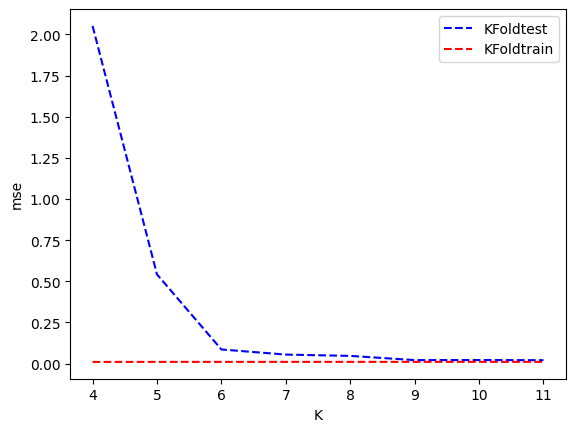

In [ ]:

from sklearn.model_selection import cross_val_score

deg = 6

X = design_matrix(x, y, deg)


K =[4,5,6,7, 8,9,10,11]
estimated_mse_KFold_test = []
estimated_mse_KFold_train = []

for k in K:
  kfold = KFold(n_splits = k)
  scores_KFold_test = []
  scores_KFold_train = []
  for train_inds, test_inds in kfold.split(X):
    Xtrain = X[train_inds]
    ftrain = f[train_inds]
    Xtest = X[test_inds]
    ftest = f[test_inds]
    beta = calcuateB(Xtrain, ftrain)
    fpred = Xtest @ beta
    ftilde = Xtrain @ beta

    scores_KFold_test.append(calculateMSE(ftest, fpred))
    scores_KFold_train.append(calculateMSE(ftrain, ftilde))

  estimated_mse_KFold_test.append(np.mean(scores_KFold_test)) # Append the mean to the list
  estimated_mse_KFold_train.append(np.mean(scores_KFold_train)) # Append the mean to the list

plt.figure()
plt.plot(K, estimated_mse_KFold_test, 'b--', label = 'KFoldtest')
plt.plot(K, estimated_mse_KFold_train, 'r--', label = 'KFoldtrain')
plt.xlabel('K')
plt.ylabel('mse')
plt.legend()
plt.show()


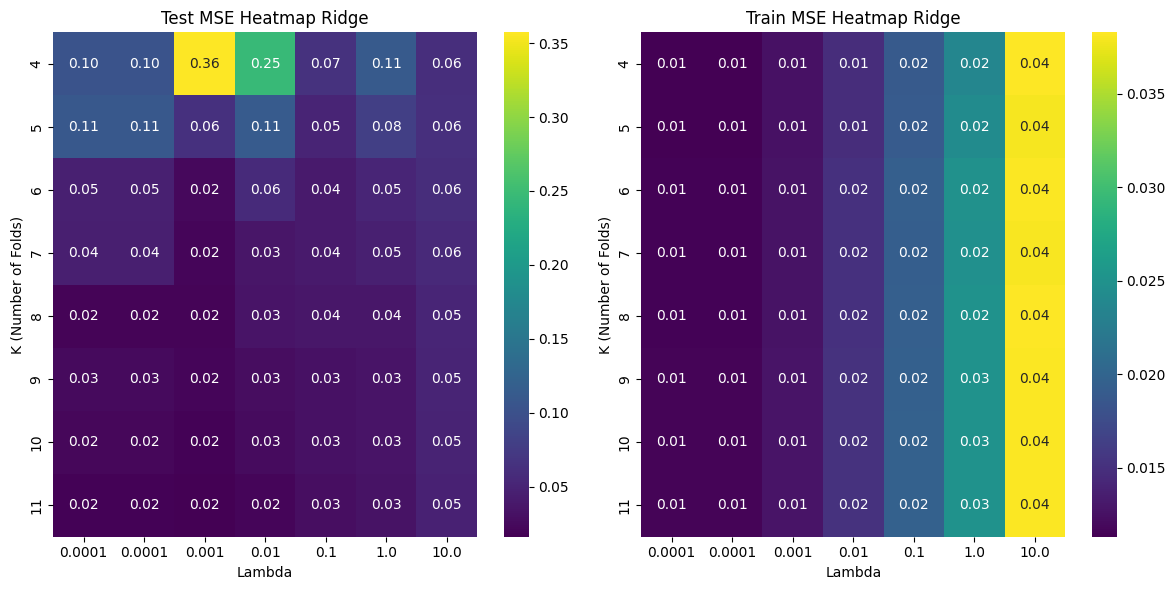

In [ ]:
#RIDGE CROSS VALIDATION
import seaborn as sns
from sklearn.model_selection import KFold

# Parametri di input
deg = 7
X = design_matrix(x, y, deg)

lm_val = [10e-5, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
K = [4, 5, 6, 7, 8, 9, 10, 11]  # Valori di k

# Creazione di una matrice per memorizzare i MSE
mse_test = np.zeros((len(K), len(lm_val)))
mse_train = np.zeros((len(K), len(lm_val)))

# K-Fold Cross-Validation
for k_index, k in enumerate(K):
    kfold = KFold(n_splits=k)

    for l_index, lmd in enumerate(lm_val):
        scores_KFold_test = []
        scores_KFold_train = []

        for train_inds, test_inds in kfold.split(X):
            Xtrain = X[train_inds]
            ftrain = f[train_inds]
            Xtest = X[test_inds]
            ftest = f[test_inds]

            # Calcolo dei coefficienti per la regressione Ridge
            beta = betaRIDGE(Xtrain, ftrain, lmd)

            # Previsioni
            fpred = Xtest @ beta
            ftilde = Xtrain @ beta

            # Calcolo degli MSE
            scores_KFold_test.append(calculateMSE(ftest, fpred))
            scores_KFold_train.append(calculateMSE(ftrain, ftilde))

        # Salvataggio dei MSE medi
        mse_test[k_index, l_index] = np.mean(scores_KFold_test)
        mse_train[k_index, l_index] = np.mean(scores_KFold_train)

# Creazione della heatmap
plt.figure(figsize=(12, 6))

# Heatmap per l'errore di test
plt.subplot(1, 2, 1)
sns.heatmap(mse_test, annot=True, fmt=".2f", cmap='viridis', xticklabels=np.round(lm_val, 4), yticklabels=K)
plt.title('Test MSE Heatmap Ridge')
plt.xlabel('Lambda')
plt.ylabel('K (Number of Folds)')

# Heatmap per l'errore di addestramento
plt.subplot(1, 2, 2)
sns.heatmap(mse_train, annot=True, fmt=".2f", cmap='viridis', xticklabels=np.round(lm_val, 4), yticklabels=K)
plt.title('Train MSE Heatmap Ridge')
plt.xlabel('Lambda')
plt.ylabel('K (Number of Folds)')

plt.tight_layout()
plt.show()


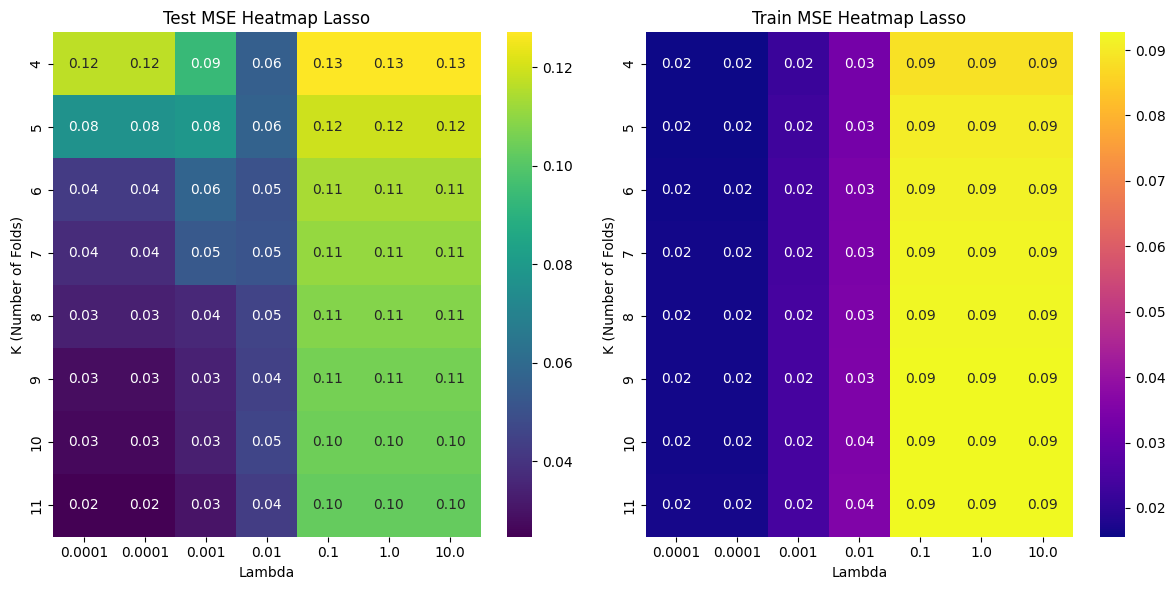

In [ ]:
#lasso cross validation

# Parametri di input
deg = 7
X = design_matrix(x, y, deg)

# Valori di lambda da testare
lm_val = [10e-5, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
K = [4, 5, 6, 7, 8, 9, 10, 11]  # Valori di k

# Creazione di una matrice per memorizzare i MSE
mse_test = np.zeros((len(K), len(lm_val)))
mse_train = np.zeros((len(K), len(lm_val)))

# K-Fold Cross-Validation
for k_index, k in enumerate(K):
    kfold = KFold(n_splits=k)

    for l_index, lmd in enumerate(lm_val):
        scores_KFold_test = []
        scores_KFold_train = []

        for train_inds, test_inds in kfold.split(X):
            Xtrain = X[train_inds]
            ftrain = f[train_inds]
            Xtest = X[test_inds]
            ftest = f[test_inds]

            RegLasso = linear_model.Lasso(lmd,fit_intercept=True, max_iter=100000)
            RegLasso.fit(Xtrain,ftrain)
            fpred = RegLasso.predict(Xtest)
            ftilde = RegLasso.predict(Xtrain)

            # Calcolo degli MSE
            scores_KFold_test.append(calculateMSE(ftest, fpred))
            scores_KFold_train.append(calculateMSE(ftrain, ftilde))

        # Salvataggio dei MSE medi
        mse_test[k_index, l_index] = np.mean(scores_KFold_test)
        mse_train[k_index, l_index] = np.mean(scores_KFold_train)

# Creazione della heatmap
plt.figure(figsize=(12, 6))

# Heatmap per l'errore di test
plt.subplot(1, 2, 1)
sns.heatmap(mse_test, annot=True, fmt=".2f", cmap='viridis', xticklabels=lm_val, yticklabels=K)
plt.title('Test MSE Heatmap Lasso')
plt.xlabel('Lambda')
plt.ylabel('K (Number of Folds)')

# Heatmap per l'errore di addestramento
plt.subplot(1, 2, 2)
sns.heatmap(mse_train, annot=True, fmt=".2f", cmap='plasma', xticklabels=lm_val, yticklabels=K)
plt.title('Train MSE Heatmap Lasso')
plt.xlabel('Lambda')
plt.ylabel('K (Number of Folds)')

plt.tight_layout()
plt.show()

# Terrain data

<ipython-input-33-2cc7dd1cd8f9>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  terrain = imread('SRTM_data_Norway_1.tif')


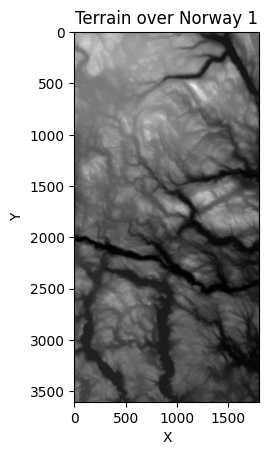

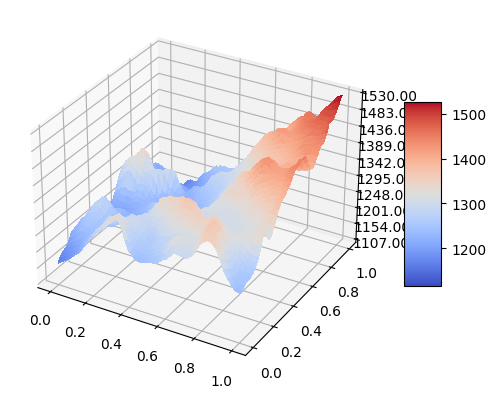

<Figure size 2000x2000 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from imageio import imread
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

# Load the terrain
terrain = imread('SRTM_data_Norway_1.tif')

# Show the terrain in 2D
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(terrain, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Size of the subset
N = 100

# Use a subset of the terrain data for analysis
terrain_subset = terrain[:N, :N]
z_shape = np.shape(terrain_subset)

# Create meshgrid for the subset
x = np.linspace(0, 1, z_shape[0])
y = np.linspace(0, 1, z_shape[1])
x, y = np.meshgrid(x, y)
z = terrain_subset

# Create a 3D plot

fig = plt.figure()
plt.figure(figsize=(20, 20))

ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis
ax.set_zlim(np.min(z), np.max(z))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

x = x.flatten()
y = y.flatten()
f = z.flatten()

OLS


Degree: 0
MSE Train Data: 1.0000000000000004
MSE Test Data: 0.9988380454169037
R2 Train Data: 0.0
R2 Test Data: -0.00021078493667814335
------------------------------
Degree: 1
MSE Train Data: 0.3610260230333767
MSE Test Data: 0.3814651859644812
R2 Train Data: 0.6389739769666233
R2 Test Data: 0.615833974495277
------------------------------
Degree: 2
MSE Train Data: 0.2072038320331325
MSE Test Data: 0.21424385405518914
R2 Train Data: 0.7927961679668675
R2 Test Data: 0.7894050880371959
------------------------------
Degree: 3
MSE Train Data: 0.14456533323582085
MSE Test Data: 0.13762639971667498
R2 Train Data: 0.8554346667641791
R2 Test Data: 0.8642762735041362
------------------------------
Degree: 4
MSE Train Data: 0.11021166641938783
MSE Test Data: 0.1179472981231641
R2 Train Data: 0.8897883335806122
R2 Test Data: 0.8828849554208322
------------------------------
Degree: 5
MSE Train Data: 0.0973874769755771
MSE Test Data: 0.09408069209180078
R2 Train Data: 0.9026125230244229
R2 Test 

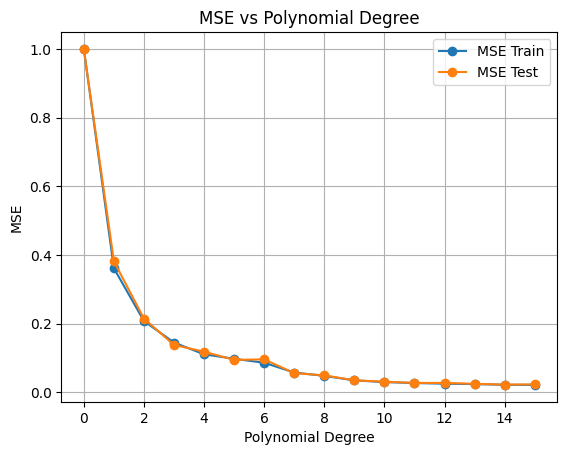

In [ ]:
from sklearn.preprocessing import StandardScaler


def split_and_scale(X, f, test_size=0.2, with_std=True):
    X_train, X_test, f_train, f_test = train_test_split(X, f, test_size=test_size)
    scaler_X = StandardScaler(with_std=with_std)
    scaler_X.fit(X_train)
    scaler_f = StandardScaler(with_std=with_std)
    scaler_f.fit(f_train.reshape(-1, 1))

    X_train_scaled = scaler_X.transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    f_train_scaled = scaler_f.transform(f_train.reshape(-1, 1)).ravel()
    f_test_scaled = scaler_f.transform(f_test.reshape(-1, 1)).ravel()

    return X_train_scaled, X_test_scaled, f_train_scaled, f_test_scaled

#create vectors to store data
maxdegree = 16
polydegree = np.zeros(maxdegree)
MSE_train = np.zeros(maxdegree)
MSE_test = np.zeros(maxdegree)
R2_train = np.zeros(maxdegree)
R2_test = np.zeros(maxdegree)

# for loop for every polynomial degree
for degree in range (maxdegree):

    # create design matrix
    X = design_matrix(x, y, degree)


    #divide into train and test data and scale
    X_train, X_test, f_train, f_test = split_and_scale(X, f)



    #calculate beta
    beta = calcuateB(X_train, f_train)


    #explain why we dont scale the data
    #ask about the intercept
    #maybe create a validation set

    #OLS

    ftilde = X_train @ beta
    fpred = X_test @ beta
    polydegree[degree] = degree
    MSE_train[degree] = calculateMSE(f_train, ftilde)
    MSE_test[degree] = calculateMSE(f_test, fpred)
    R2_train[degree] = R2(f_train, ftilde)
    R2_test[degree] = R2(f_test, fpred)

    print(f"Degree: {degree}")
    #print(f"Beta: {beta}")
    print(f"MSE Train Data: {MSE_train[degree]}")
    print(f"MSE Test Data: {MSE_test[degree]}")
    print(f"R2 Train Data: {R2_train[degree]}")
    print(f"R2 Test Data: {R2_test[degree]}")
    print("-" * 30)


# Plotting MSE values
plt.plot(polydegree, MSE_train, label='MSE Train', marker='o')
plt.plot(polydegree, MSE_test, label='MSE Test', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('MSE vs Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()




Lasso

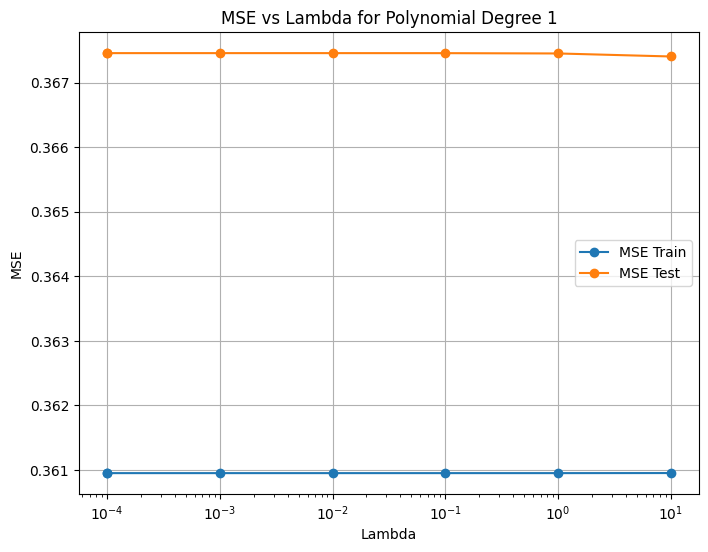

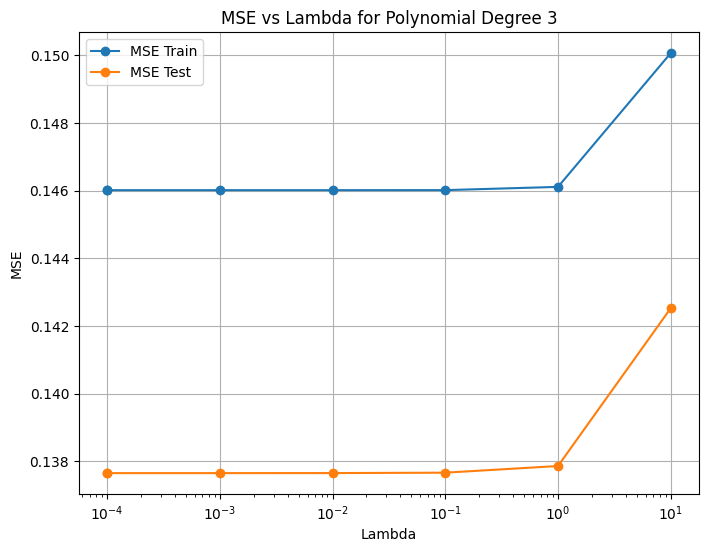

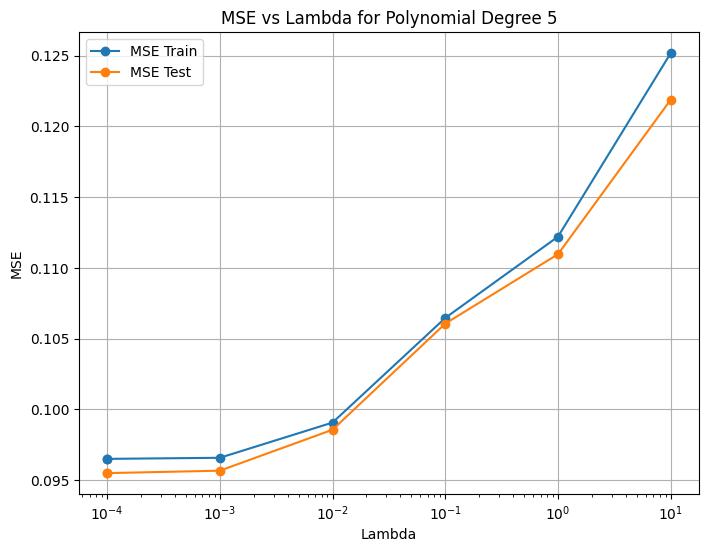

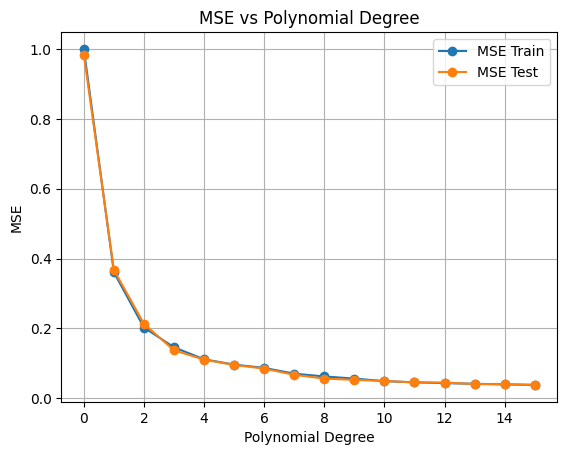

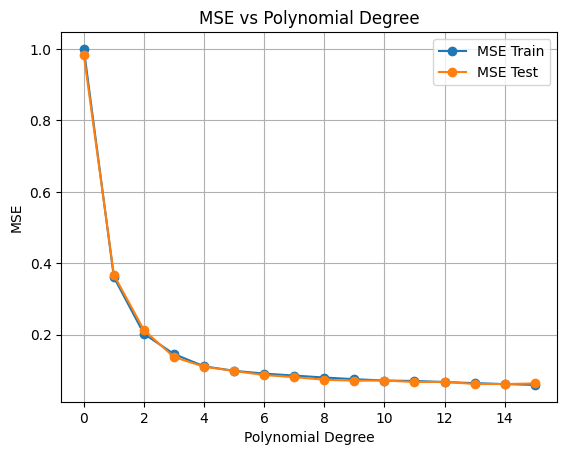

In [ ]:
lm_val = [10e-5, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]

MSEridge_train = np.zeros((maxdegree,len(lm_val)))
MSEridge_test = np.zeros((maxdegree,len(lm_val)))
R2ridge_train = np.zeros((maxdegree,len(lm_val)))
R2ridge_test = np.zeros((maxdegree,len(lm_val)))

#start of the big loop
for i in range (maxdegree):
  X = design_matrix(x, y, i)
  X_train, X_test, f_train, f_test = split_and_scale(X, f)
  #polynomial ridge regression (both with my model and scikt)
  for j, lmd in enumerate(lm_val):
      betaridge = betaRIDGE(X_train, f_train, lmd)
      ftildeRidge = X_train @ betaridge
      fpredictRidge = X_test @ betaridge
      #fill the matrices
      MSEridge_train[i, j] = calculateMSE(f_train, ftildeRidge)
      MSEridge_test[i, j] = calculateMSE(f_test, fpredictRidge)
      R2ridge_train[i, j] = R2(f_train, ftildeRidge)
      R2ridge_test[i, j] = R2(f_test, fpredictRidge)

  if i in [1, 3, 5]:
      plt.figure(figsize=(8, 6))
      plt.plot(lm_val, MSEridge_train[i], label='MSE Train', marker='o')
      plt.plot(lm_val, MSEridge_test[i], label='MSE Test', marker='o')
      plt.xscale('log')  # Scala logaritmica per lambda
      plt.xlabel('Lambda')
      plt.ylabel('MSE')
      plt.title(f'MSE vs Lambda for Polynomial Degree {i}')
      plt.legend()
      plt.grid(True)
      plt.show()

for k, lmd in enumerate(lm_val):
    if k in [1, 3]:
        plt.plot(polydegree, MSEridge_train[:,k], label='MSE Train', marker='o')
        plt.plot(polydegree, MSEridge_test[:,k], label='MSE Test', marker='o')
        plt.xlabel('Polynomial Degree')
        plt.ylabel('MSE')
        plt.title('MSE vs Polynomial Degree')
        plt.legend()
        plt.grid(True)
        plt.show()


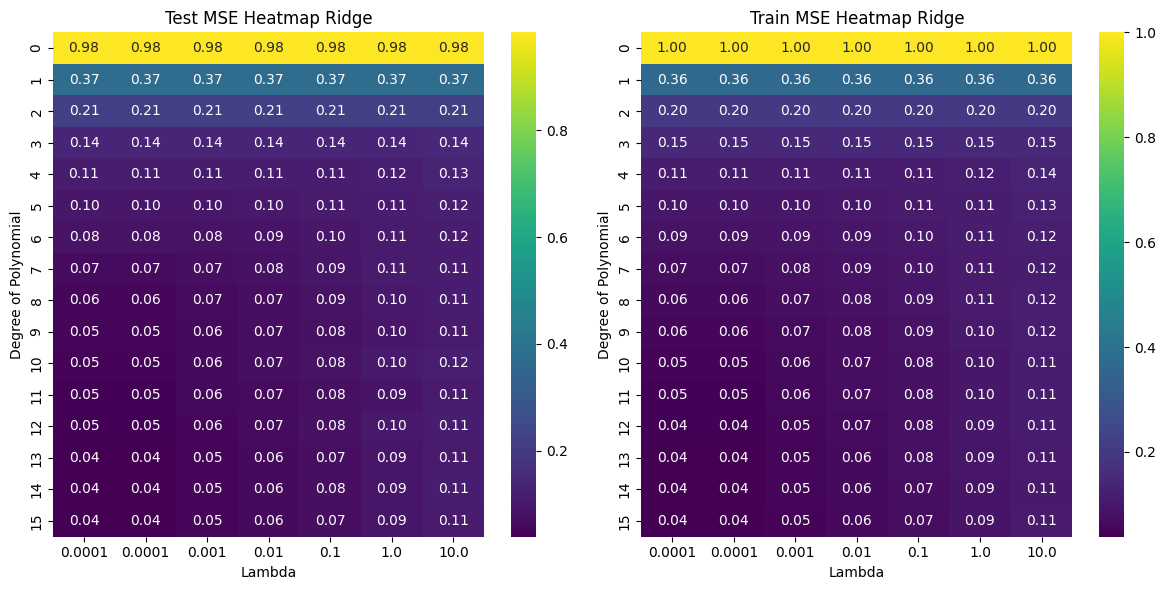

In [ ]:
# Creazione delle heatmap per i risultati
plt.figure(figsize=(12, 6))

# Heatmap per l'errore di test MSE Ridge
plt.subplot(1, 2, 1)
sns.heatmap(MSEridge_test, annot=True, fmt=".2f", cmap='viridis', xticklabels=lm_val, yticklabels=range(maxdegree) )
ax.set_aspect('equal', adjustable='box')
plt.title('Test MSE Heatmap Ridge')
plt.xlabel('Lambda')
plt.ylabel('Degree of Polynomial')

# Heatmap per l'errore di addestramento MSE Ridge
plt.subplot(1, 2, 2)
sns.heatmap(MSEridge_train, annot=True, fmt=".2f", cmap='viridis', xticklabels=lm_val, yticklabels=range(maxdegree))
plt.title('Train MSE Heatmap Ridge')
plt.xlabel('Lambda')
plt.ylabel('Degree of Polynomial')

# Imposta il layout per evitare sovrapposizioni
plt.tight_layout()
plt.show()

Lasso

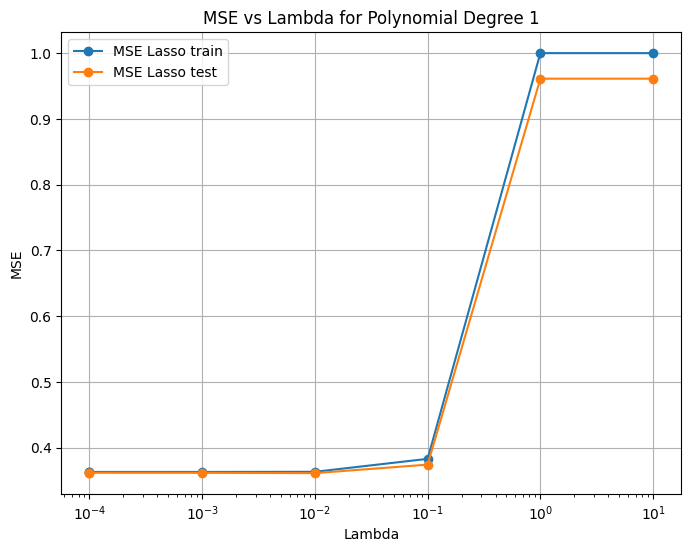

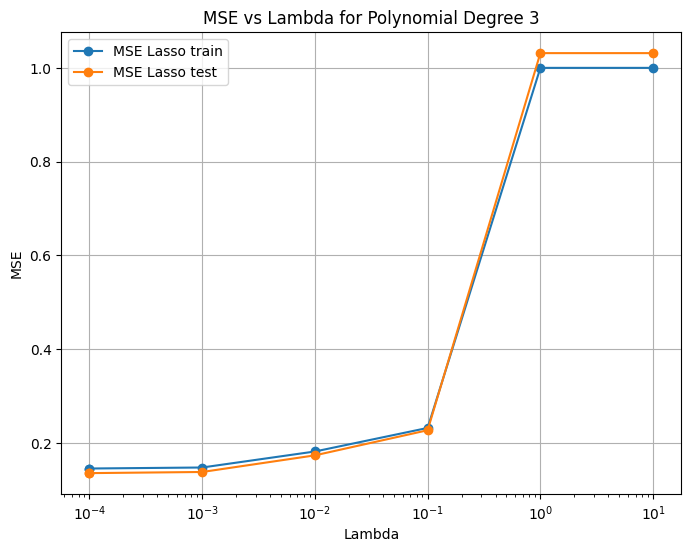

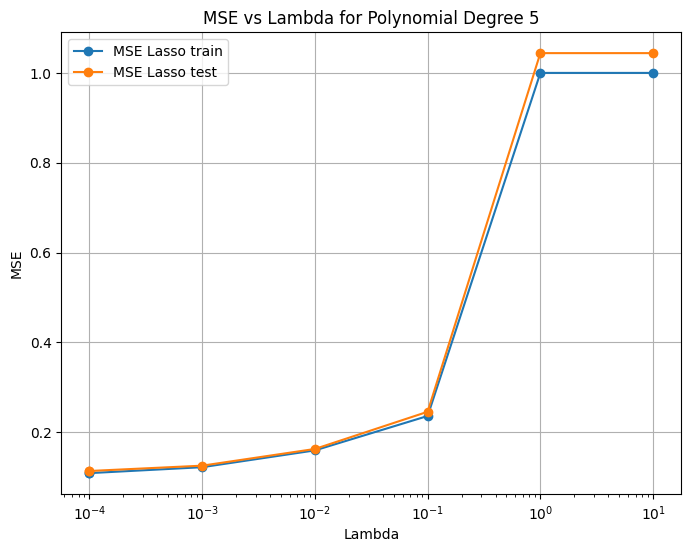

In [ ]:
MSElasso_train = np.zeros((maxdegree,len(lm_val)))
MSElasso_test = np.zeros((maxdegree,len(lm_val)))
R2lasso_train = np.zeros((maxdegree,len(lm_val)))
R2lasso_test = np.zeros((maxdegree,len(lm_val)))


#start of the big loop
for i in range (maxdegree):
  X = design_matrix(x, y, i)
  X_train, X_test, f_train, f_test = split_and_scale(X, f)

  #polynomial ridge regression (both with my model and scikt)
  for j, lmd in enumerate(lm_val):
      RegLasso = linear_model.Lasso(lmd,fit_intercept=True, max_iter=1000000)
      RegLasso.fit(X_train,f_train)
      fpredictLasso = RegLasso.predict(X_test)
      ftildeLasso = RegLasso.predict(X_train)
      #fill the matrices
      MSElasso_train[i,j] = calculateMSE(f_train, ftildeLasso)
      MSElasso_test[i,j] = calculateMSE(f_test, fpredictLasso)
      R2lasso_train[i,j] = R2(f_train, ftildeLasso)
      R2lasso_test[i,j] = R2(f_test, fpredictLasso)

  if i in [1, 3, 5]:
      plt.figure(figsize=(8, 6))
      plt.plot(lm_val, MSElasso_train[i], label='MSE Lasso train', marker='o')
      plt.plot(lm_val, MSElasso_test[i], label='MSE Lasso test', marker='o')
      plt.xscale('log')  # Scala logaritmica per lambda
      plt.xlabel('Lambda')
      plt.ylabel('MSE')
      plt.title(f'MSE vs Lambda for Polynomial Degree {i}')
      plt.legend()
      plt.grid(True)
      plt.show()

for k, lmd in enumerate(lm_val):
    if k in [1, 3]:
        plt.plot(polydegree, MSElasso_train[:,k], label='MSE Train', marker='o')
        plt.plot(polydegree, MSElasso_test[:,k], label='MSE Test', marker='o')
        plt.xlabel('Polynomial Degree')
        plt.ylabel('MSE')
        plt.title('MSE vs Polynomial Degree')
        plt.legend()
        plt.grid(True)
        plt.show()



In [ ]:
# Creazione delle heatmap per i risultati
plt.figure(figsize=(12, 6))

# Heatmap per l'errore di test MSE Ridge
plt.subplot(1, 2, 1)
sns.heatmap(MSElasso_test, annot=True, fmt=".2f", cmap='viridis', xticklabels=lm_val, yticklabels=range(maxdegree) )
ax.set_aspect('equal', adjustable='box')
plt.title('Test MSE Heatmap Lasso')
plt.xlabel('Lambda')
plt.ylabel('Degree of Polynomial')

# Heatmap per l'errore di addestramento MSE Ridge
plt.subplot(1, 2, 2)
sns.heatmap(MSElasso_train, annot=True, fmt=".2f", cmap='viridis', xticklabels=lm_val, yticklabels=range(maxdegree))
plt.title('Train MSE Heatmap Lasso')
plt.xlabel('Lambda')
plt.ylabel('Degree of Polynomial')

# Imposta il layout per evitare sovrapposizioni
plt.tight_layout()
plt.show()

Bias-variance trade-off

In [ ]:
maxdegree= 16
polydegree = np.zeros(maxdegree)
error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)

n_boostraps = 200

for i in range(maxdegree):
    X = design_matrix(x, y, i)
    X_train, X_test, f_train, f_test = train_test_split(X, f, test_size=0.2)
    f_pred = np.empty((f_test.shape[0], n_boostraps))
    for j in range(n_boostraps):
        X_, f_ = resample(X_train, f_train)
        beta_resampled = calcuateB(X_, f_)
        f_pred[:, j] = X_test @ beta_resampled

    polydegree[i] = i
    #error[i] = np.mean( np.mean((f_test - f_pred)**2, axis=1, keepdims=True) )
    error[i] = np.mean(np.mean((f_test[:, np.newaxis] - f_pred)**2, axis=1, keepdims=True))
    bias[i] = np.mean( (f_test[:, np.newaxis] - np.mean(f_pred, axis=1, keepdims=True))**2 )
    variance[i] = np.mean( np.var(f_pred, axis=1, keepdims=True))
    print(f"Degree: {i}")
    print(f"MSE: {error[i]}")
    print(f"Bias: {bias[i]}")
    print(f"Variance: {variance[i]}")
    print('{} >= {} + {} = {}'.format(error[i], bias[i], variance[i], bias[i]+variance[i]))
    print("-" * 30)

plt.figure(figsize=(10, 6))
plt.plot(polydegree, error, label='Error', color='blue', marker='o')
plt.plot(polydegree, bias, label='Bias', color='red', marker='s')
plt.plot(polydegree, variance, label='Variance', color='green', marker='^')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Value')
plt.title('Error, Bias, and Variance vs Degree of Polynomial')
plt.legend()
plt.grid(True)
plt.show()
